# Features Reduction techniques

In [76]:
from sklearn.utils.multiclass import unique_labels
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, r2_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from time import time
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

Le tecniche di feature reduction sono un tema molto importante in machile learning. I motivi sono principalmente due:

1. Numerico, avere meno feature da analizzare velocizza la fase di fit dei modelli
2. Teorico, avere meno feature permette di controllarle meglio, avere modelli più stabili e fa si che le differenze tra due sample siano più facilmente notate dai modelli.

Vediamo la principale tecnica.
* [__Principal component analysis__](https://en.wikipedia.org/wiki/Principal_component_analysis) or PCA



## Principal Component Analysis

Iniziamo dalla riduzione dimensionale conosciuto come principal component analysis

PCA è fondamentalmente un algoritmo di riduzione dimensionale, ma può essere molto utile come **tool di visualizzazione**.

### Proiezione PCA 

Matematicamente è molto facile definire cosa fa PCA,
è una **proiezione** di uno spazione $n$-dimensionale in uno sottospazio $k$-dimensionale.

Ciò avviene tramite una trasformazione lineare delle variabili che proietta quelle originarie in un nuovo sistema cartesiano in cui la nuova variabile con la maggiore varianza viene proiettata sul primo asse, la variabile nuova, seconda per dimensione della varianza, sul secondo asse e così via.

La riduzione della complessità avviene limitandosi ad analizzare le principali, per varianza, tra le nuove variabili.

### Example

Consideriamo il dataframe sui vini

In [77]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Vogliamo visualizzare le componenti più rilevanti, cioè le feature che contrbuiscono maggiormente ai processi di machine learning, _i.e._ quelle con la maggior varianza

In [78]:
pca = PCA(n_components=2)
projected = pca.fit_transform(df)

Abbiamo proiettato in un piano a 2 dimensioni, definito da due vettori che sono le due componenti della PCA

In [79]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

#### Motivation $1$: Data visualisation

Possiamo plottare i sample in un grafico dato che ora sono in due dimensioni.

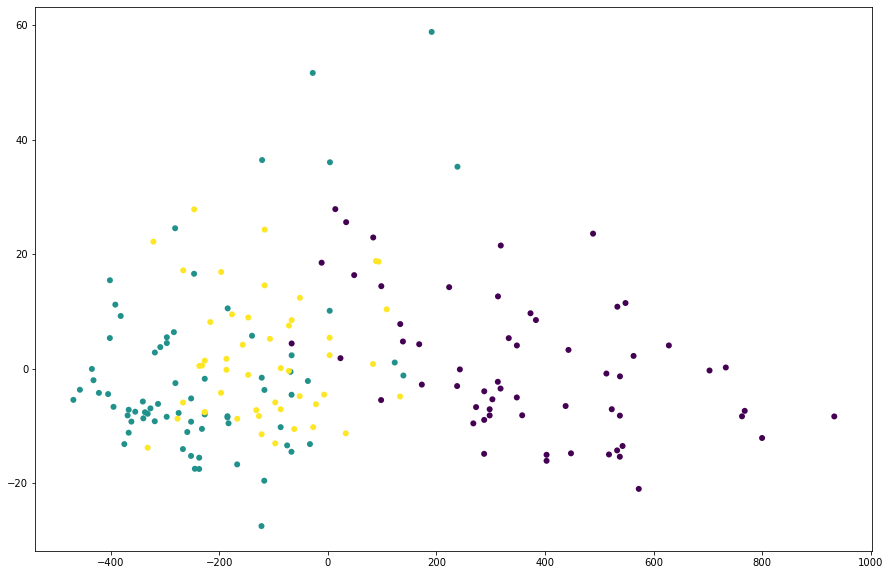

In [80]:
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1], c=wine.target, edgecolor='none', alpha=1)#, cmap=plt.cm.get_cmap('flag', 3))

### Ricostruzione

PCA è una proiezione. Significa che stiamo perdendo informazioni.
 
è possibile calcolare l'errore comparando il risultato della _trasformata inversa_ con il dataset originale.

## Some more words

Vediamo un esempio per comprendere meglio la procedura di riduzione con un dataset 2D

Consideriamo un dataset di 200 punti 

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

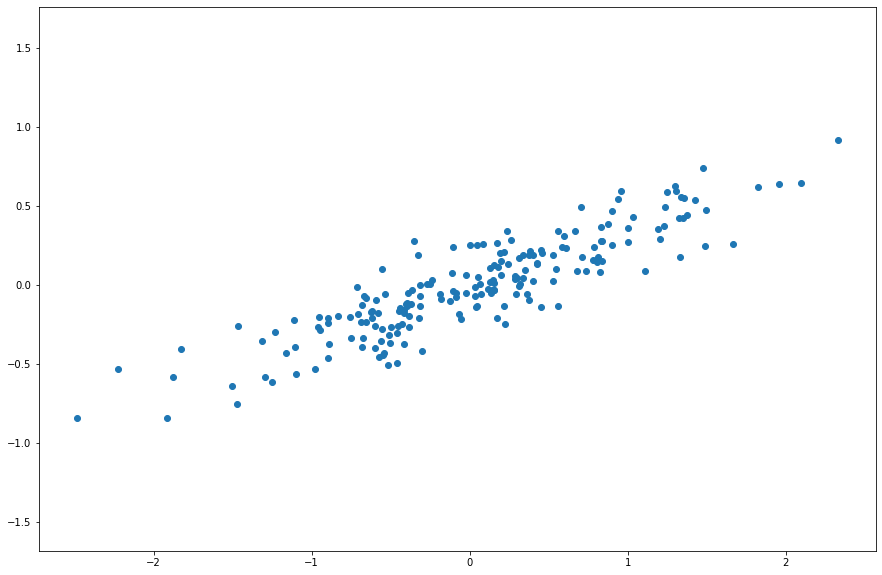

In [81]:
rng = np.random.RandomState(1)  # 200 random points
plt.figure(figsize=(15, 10))
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [82]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

Ad occhio è chiaro che c'è una relazione lineare tra $x$ e $y$.

In questo esercizio non ci interessa prevedere $y$ a partire da $x$ ma siamo interessati a studiare la relazione tra le due variabili

Lo vedremo meglio nelle prossime lezioni, ma questo è il primo esempio di __unsupervised learning problem__

Con la principal component analysis, la relazione tra le due variabili si concentra nel trovare gli assi principali del dataset ed usarli per descriverlo.

In [83]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Con il metodo _fit_ l'oggetto impara le caratteristiche del dataset tra cui, i `components` e l'`explained variance`.

Per vedere tutti i metodi dell'oggetto si può usare la funzione `dir`.

In [84]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

Vediamo le due proprietà che ci interessano

In [85]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [86]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Per capire cosa sono questi numeri li visualizziamo come vettori su dati di input.

Usiamo i `components_` per definire la direzione del vettore e l'`explained variance_` per la lunghezza

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

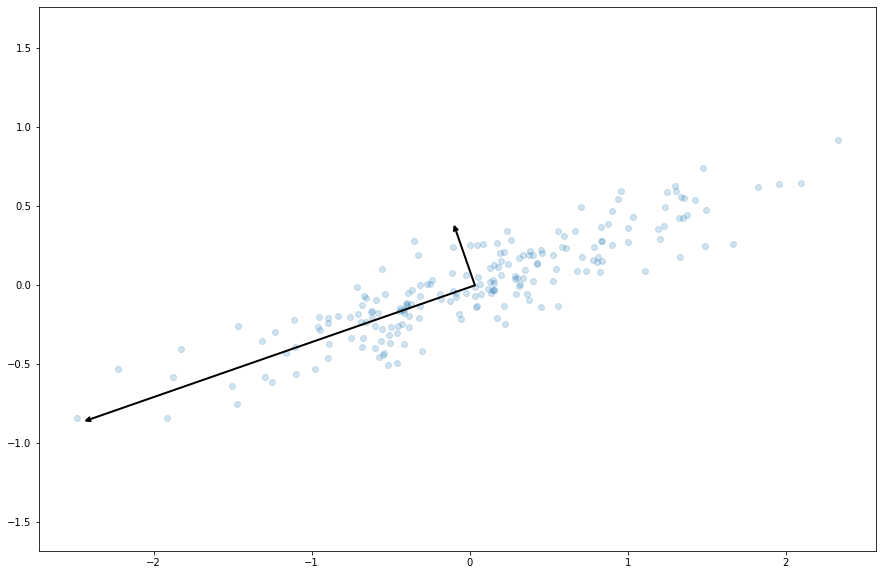

In [87]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


# plot data
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Questi vettori rappresentano gli assi principali (o components) dei dati. La lunghezza è un indicatore di quanto è importante l'asse, ovvero di quanto _descrive_ i dati (più precisamente è la misura della varianza dei dati quando sono proiettati su quell'asse).

La proiezione di ogni punto sugli assi principali crea i famosi **principal component**



[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

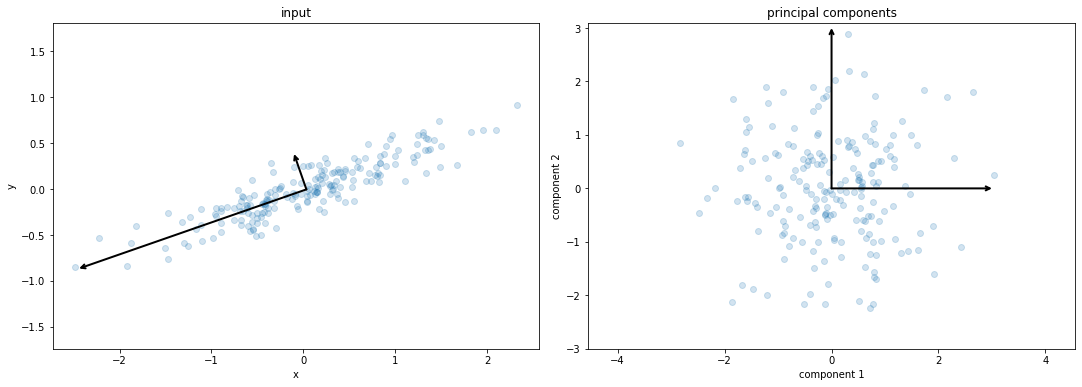

In [88]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

Può sembrare solo una curiosità matematica ma PCA è una tecnica che ha applicazioni molto importanti in machine learning, sia per la modellazione che per l'esplorazione dei dati.

### PCA per dimensionality reduction

Usare PCA per la riduzione dimensionale consiste nell'azzerare uno o più componenti principali partendo dalla più piccola.

L'obiettivo è quello di ottenere il dataset a dimensioni ridotte che meglio preserva la massima varianza tra i dati.

Proviamo a ridurre la dimensionalità nell'esempio di prima

In [89]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


I dati trasformati sono stati ridotti ad una sola dimensione. Per capire l'effetto di questa riduzione possiamo fare la trasformata inversa a partire dal dataset ridotto e plottarla sui dati originali

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

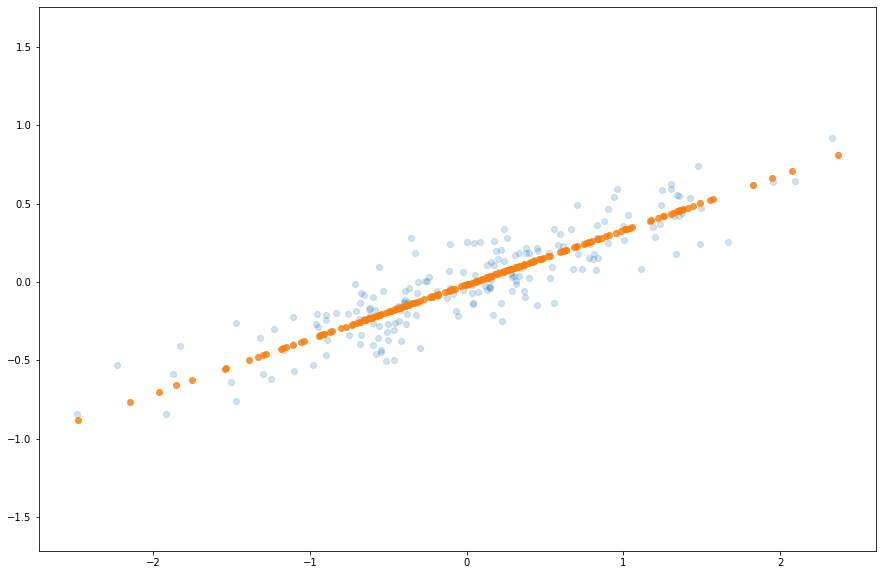

In [90]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

I punti blue sono quelli originali, gli arancioni sono la versione proiettata.
Ora è chiaro cosa significa ridurre la dimensionalità: le informazioni sull'asse meno importante vengono rimosse, lasciando solo le informazioni sull'asse a più importante (a maggior varianza).

La percentuale di varianza dell'asse rimosso è la misura di quanta informazione è andata persa.

#### Motivation $2$: Data compression

Il dataset a dimensione ridotta è "abbastanza buono" per codificare le relazioni tra i punti di maggior importanza. Anche se le dimensioni sono state ridotte del $50\%$, le relazioni tra i punti sono state preservate.

Questo è un grosso vantaggio in termini di riduzione dei costi di computazione.
In altre parole, abbiamo fatto una riduzione intelligente dei dati guidata dall'obiettivo di mantenere quanta più informazione possibile del dataset originale.

#### Note

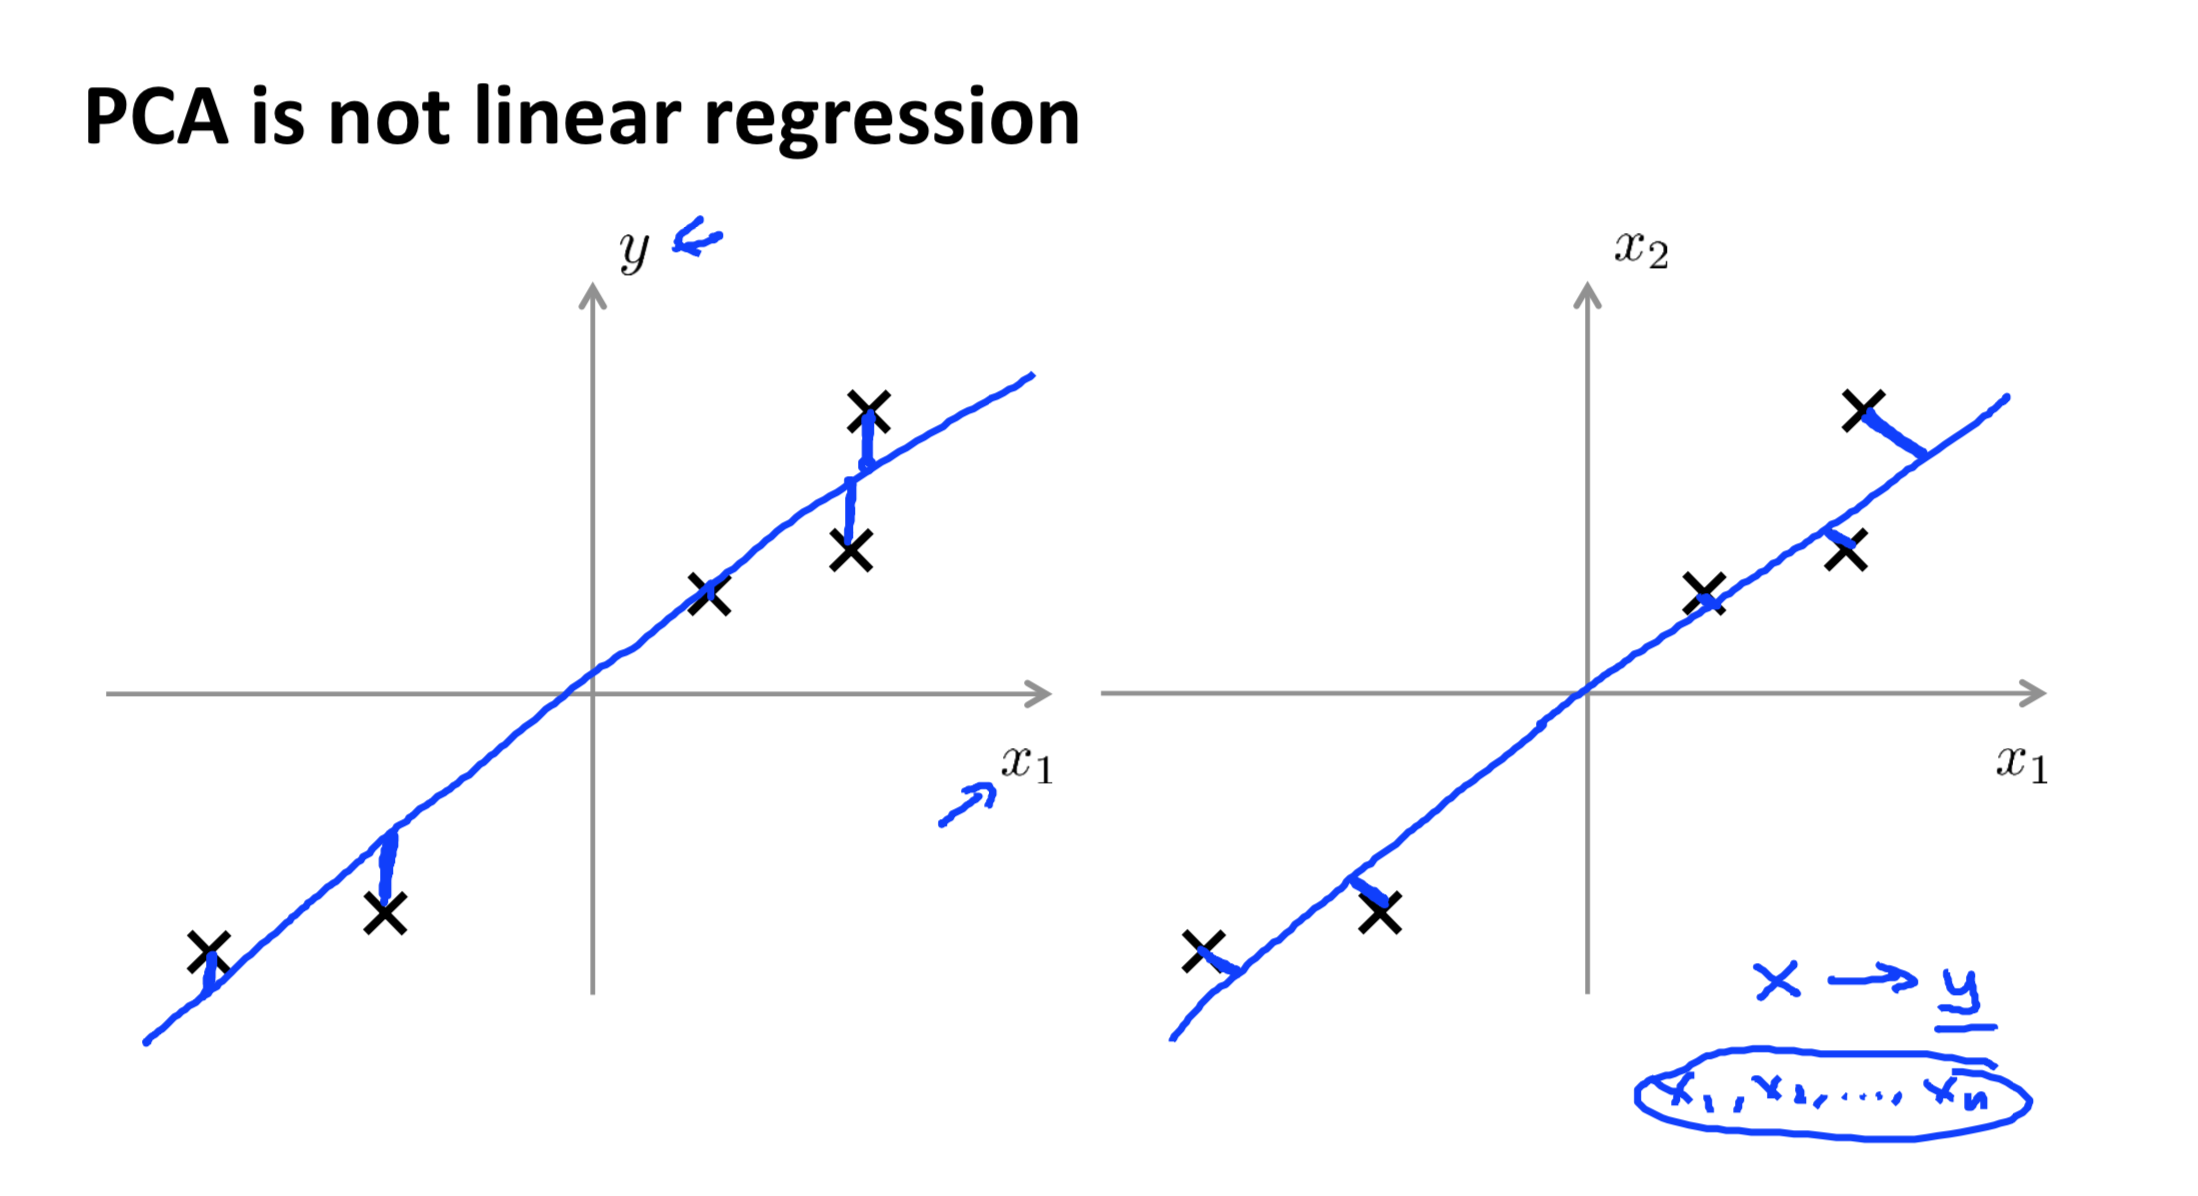

Intuitivamente si può pensare a PCA con la seguente definizione euristica

![title](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

### PCA for data visualisation

L'utilità della riduzione dimensionale si può apprezzare anche oltre le due dimensioni.

Vediamo l'applicazione di PCA ad un famoso dataset.

In [91]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

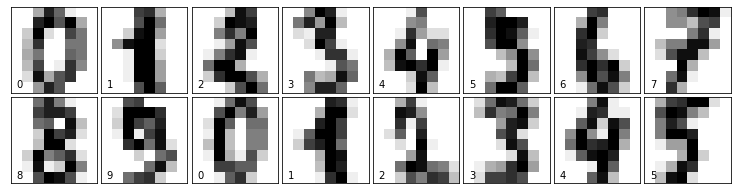

In [92]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Il dataset contiene immagini di $8\times 8$ pixel, quindi ogni sample ha 64 dimensioni (colonne).

Per capire le relazioni tra i punti proviamo a utilizzare PCA per proiettare le immagini in sole 2 dimensioni.

In [93]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Adesso si possono plottare le due componenti principali.

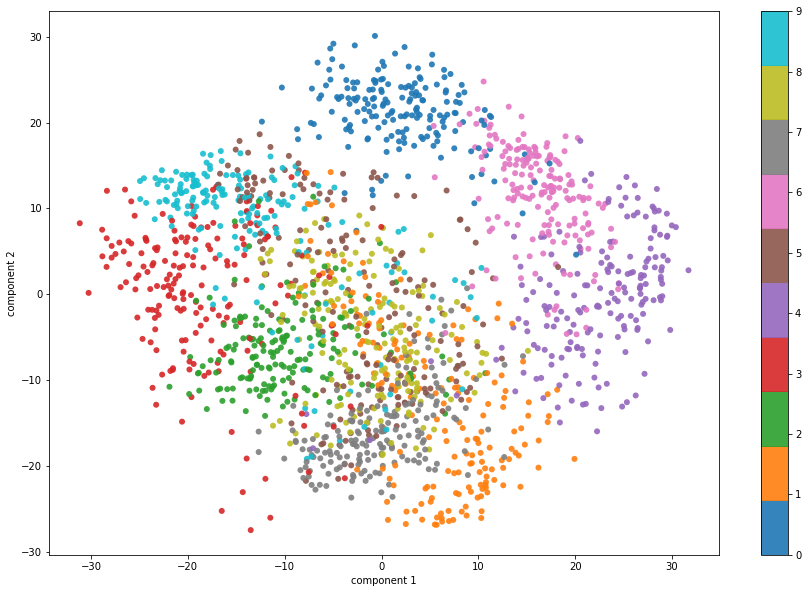

In [94]:
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.9,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Cosa sono queste componenti? Il dataset iniziale era a $64$ dimensioni ed i suoi punti sono stati proiettati sulle direttrici con la massima varianza. Abbiamo trovato la trasformazione ottimale delle spazio da $64$ a $2$ dimensioni in modo **non supervisionato** (Non abbiamo mai usato le label)

### Scegliere in numero di components

Un parte importante di usare PCA è la capacità di stimare quante componenti sono necessarie per descrivere efficacemente i dati.

Uno dei modi per farlo è utlizzare il _cumulative explained variance ratio_ in funzione del numero di componenti.

Molto facile da fare con Scikit-learn tramite il metodo `explained_variance_ratio_`.

Text(0, 0.5, 'cumulative explained variance')

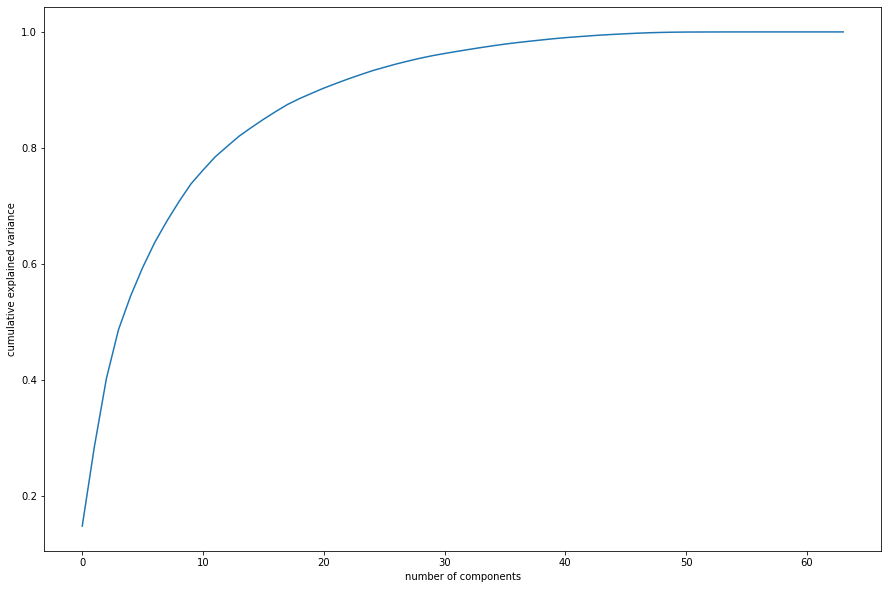

In [95]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Questa curva indentifica quanta varianza è spiegata dai primi $N$ componenti, ordinati per importanza. Ad esempio si vede che i primi $10$ componenti contengono il $75\%$ della varianza, mentre con $45$ su arriva vicino a $100$.

Si vede inoltre che la proiezione a 2 dimensioni perde moltissima informazione ed avremmo bisogno di circa 20 componenti per mantenere il 90% della varianza.

Original


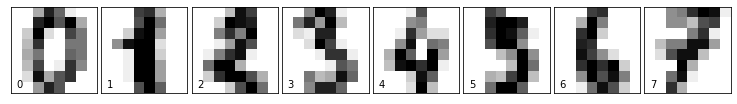

In [96]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(8):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
print("Original")

2D_Compression


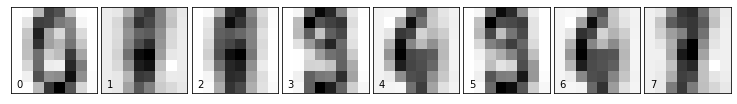

In [97]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
d2_reconstruction = pca.inverse_transform(projected)
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(d2_reconstruction[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
print("2D_Compression")

10D_Compression


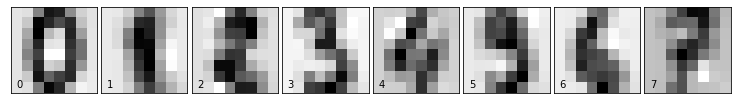

In [98]:
pca = PCA(n_components=10)  # project from 64 to 10 dimensions
projected = pca.fit_transform(digits.data)
d10_reconstruction = pca.inverse_transform(projected)
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(d10_reconstruction[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
print("10D_Compression")

20D_Compression


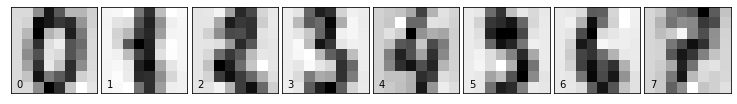

In [99]:
pca = PCA(n_components=20)  # project from 64 to 20 dimensions
projected = pca.fit_transform(digits.data)
d20_reconstruction = pca.inverse_transform(projected)
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(d20_reconstruction[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
print("20D_Compression")

45D_Compression


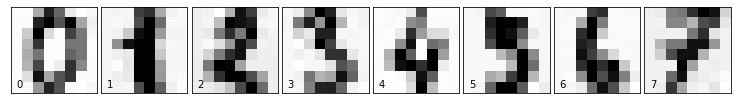

In [100]:
pca = PCA(n_components=45)  # project from 64 to 45 dimensions
projected = pca.fit_transform(digits.data)
d45_reconstruction = pca.inverse_transform(projected)
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(d45_reconstruction[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
print("45D_Compression")

### PCA as Noise Filtering

Un altro esempio dell'utilità della PCA è il filtraggio anti rumore.

L'idea è: ogni componente con una varianza maggiore rispetto all'effetto del rumore non viene intaccata dal rumore. Quindi l'operazione di compressione-ricostruzione dovrebbe mantenere il segnale ed eliminare il rumore.

Vediamo come funziona aggiungendo rumore alle immagini del dataset.

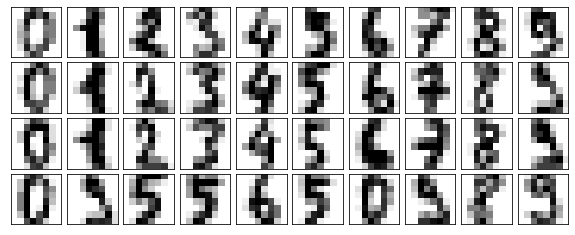

In [101]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))


plot_digits(digits.data)

Aggiungiamo rumore casuale e riplottiamo

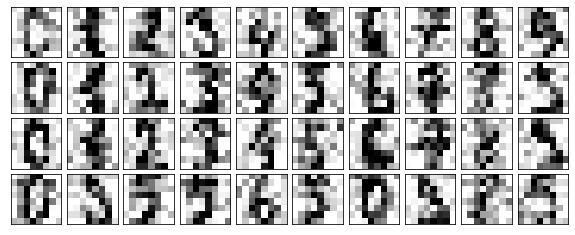

In [102]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Le  immagini ora sono rumorose e congono pixel casuali.

Applichiamo PCA verificando che la proiezione mantenga il $50\%$ della varianza

Questo di può ottenere settando il parametro `n_components =  0.5`
> If `0 < n_components < 1` and `svd_solver == 'full'`, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by `n_components`.

In [103]:
pca = PCA(n_components=.5).fit(noisy)
pca.n_components_

12

Significa che il $50\%$ della varianza sta nelle prime $12$ componenti principali.
Calcoliamo i components e usiamo la trasformata inversa per riplottare le immagini

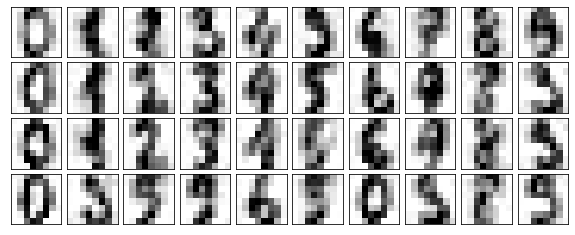

In [104]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Questa proprieta di filtro antirumore della PCA può essere sfruttata in fase di modellazione.

Invece di allenare un classificatore su un dataset con molte dimensioni è possibile allenarno su una rappresentazione di dimensioni minori che automaticamente funge da filtro antirumore.

## <font color= "red"> Exercise </font> 

Applica la PCA per la compressione di immaggini, poi plotta le immagini dopo la trasformazione inversa.

Useremo il dataset di "Olivetti face", disponibile in scikit-learn.

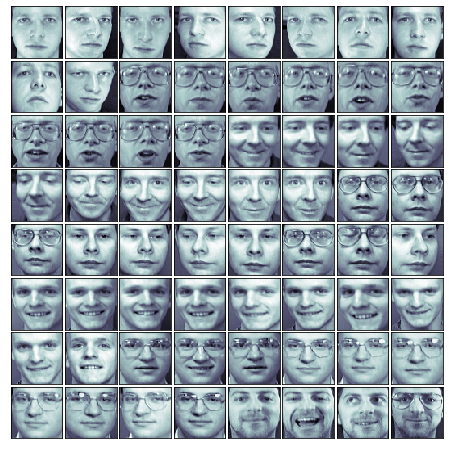

In [105]:
oliv = datasets.fetch_olivetti_faces()

# Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6, 6))

# plot the faces, each image is 64 by 64 pixels
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

Esploriamo il dataset. Quante immagini ci sono? quali sono le dimensioni?

In [106]:
import math
oliv.data.shape, math.sqrt(oliv.data.shape[1]), oliv.data.nbytes / 1024 / 1024, pd.DataFrame(data=oliv.data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4096 entries, 0 to 4095
dtypes: float32(4096)
memory usage: 6.3 MB


((400, 4096), 64.0, 6.25, None)

Vogliamo comprimere le immagini in una matrice $8 \times 8$ pixels. Usa PCA e memorizza i risultati in una matrice $X_{proj}$.

In [107]:
X, y = oliv.data, oliv.target

pca = PCA(n_components=64)  # project from 64 to 2 dimensions
X_proj = pca.fit_transform(oliv.data)

X_proj.shape

(400, 64)

Quanta varianza abbiamo mantenuto?

In [110]:
retained_var = np.sum(pca.explained_variance_ratio_)
print('La varianza residua è il %.1f%% del totale' %
      (retained_var*100))

La varianza residua è il 89.7% del totale


Se tutto è corretto abbiamo mantenuto una varianza superiore all'$89\%$.

Ottimo!
Ora abbiamo un dataset di $64$ dimensioni, generato grazie alle $64$ principali componenti.

Ognuna di queste componenti può spiegare alcune variazioni del dataset originale. Il parametro `components_` dell'oggetto pca ritorna le componenti con la maggior varianza.

Proviamo ora a visualizzare le top $8$ componenti principali.
Non si tratta di una ricostruzione del dataset originale, vogliamo solo visualizzare le componenti principali sottoforma di immagine.

Le componenti principali sono vettori con **la stessa lunghezza del numero di feature**, _i.e._ $4096$. 

Possiamo fare reshape in una matrice $64 \times 64$ e plottarle.

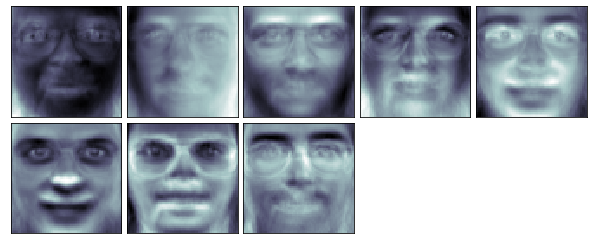

In [118]:
# Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8, 8))

# plot the faces, each image is 64 by 64 pixels
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X=np.reshape(pca.components_[i, :], (64, 64)), cmap=plt.cm.bone, interpolation='nearest')

Queste sono le $8$ componenti principale, in un certo senso **la base** del nostro dataset ridotto.

Proviamo ora a ricostruire l'immagine usando il dataset ridotto. In altre parole prima abbiamo ridotto le immagini a $64 \times 64$ pixel in immagini $8 \times 8$. 

Ora ritrasformiamo (_inverse_transform_) le immagini $8\times 8$ a $64 \times 64$ dimensioni come nell'esempio del filtro antirumore.

In [ ]:
# reshaping as 400 images of 64x64 dimension

# Code here

# Setup a figure 8 inches by 8 inches
X_proj_img = np.reshape(X_inv_proj, (400, 64, 64))
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

Non male, le immaggini sembrano ben ricostruite anche se mancano alcuni dettagli.

Considerando che abbiamo ridotto le immagini di 64 volte è un ottimo risultato.